

### 📘 **Theory Questions**

1. **What is hypothesis testing in statistics?**  
   Hypothesis testing is a statistical method used to make decisions using data. It helps determine whether there is enough evidence in a sample to infer that a condition holds true for the entire population.

2. **What is the null hypothesis, and how does it differ from the alternative hypothesis?**  
   - **Null hypothesis (H₀):** Assumes no effect or no difference (status quo).  
   - **Alternative hypothesis (H₁ or Ha):** Contradicts the null; suggests an effect or difference exists.

3. **What is the significance level in hypothesis testing, and why is it important?**  
   The significance level (α) is the threshold for rejecting H₀, often set at 0.05. It represents the probability of making a Type I error (false positive).

4. **What does a P-value represent in hypothesis testing?**  
   The P-value is the probability of obtaining a test statistic at least as extreme as the observed value, assuming H₀ is true.

5. **How do you interpret the P-value in hypothesis testing?**  
   - **P ≤ α:** Reject H₀ (evidence supports H₁)  
   - **P > α:** Fail to reject H₀ (not enough evidence for H₁)

6. **What are Type 1 and Type 2 errors in hypothesis testing?**  
   - **Type I Error:** Rejecting a true H₀ (false positive)  
   - **Type II Error:** Failing to reject a false H₀ (false negative)

7. **What is the difference between a one-tailed and a two-tailed test in hypothesis testing?**  
   - **One-tailed:** Tests for direction (e.g., greater than)  
   - **Two-tailed:** Tests for any difference (e.g., not equal)

8. **What is the Z-test, and when is it used in hypothesis testing?**  
   Used when the population standard deviation is known and sample size is large (n > 30). It compares sample and population means.

9. **How do you calculate the Z-score, and what does it represent in hypothesis testing?**  
   \[
   Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}
   \]  
   It measures how many standard deviations the sample mean is from the population mean.

10. **What is the T-distribution, and when should it be used instead of the normal distribution?**  
   Use it when sample size is small (n < 30) and population SD is unknown. It's similar to normal but has heavier tails.

11. **What is the difference between a Z-test and a T-test?**  
   - **Z-test:** Known population SD and large sample  
   - **T-test:** Unknown SD and small sample

12. **What is the T-test, and how is it used in hypothesis testing?**  
   It tests if there's a significant difference between sample means or a sample and a known mean.

13. **What is the relationship between Z-test and T-test in hypothesis testing?**  
   Both test means. T-test generalizes Z-test for small samples with unknown population SD.

14. **What is a confidence interval, and how is it used to interpret statistical results?**  
   It’s a range of values likely to include the population parameter. For example, 95% CI means we’re 95% confident the true mean lies in this range.

15. **What is the margin of error, and how does it affect the confidence interval?**  
   It’s the maximum expected difference between the sample and population parameter. Larger margin = wider CI.

16. **How is Bayes' Theorem used in statistics, and what is its significance?**  
   It updates the probability of a hypothesis as more evidence/data becomes available:
   \[
   P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
   \]

17. **What is the Chi-square distribution, and when is it used?**  
   It models the distribution of a sum of squared standard normal variables. Used in tests for variance, independence, and goodness of fit.

18. **What is the Chi-square goodness of fit test, and how is it applied?**  
   It compares observed frequencies with expected ones to determine if a sample fits a distribution.

19. **What is the F-distribution, and when is it used in hypothesis testing?**  
   Used to compare two variances. It’s right-skewed and always positive.

20. **What is an ANOVA test, and what are its assumptions?**  
   ANOVA (Analysis of Variance) tests differences among group means.  
   Assumptions:
   - Independence
   - Normality
   - Equal variance

21. **What are the different types of ANOVA tests?**  
   - **One-way ANOVA:** One independent variable  
   - **Two-way ANOVA:** Two independent variables  
   - **Repeated measures ANOVA:** For related groups

22. **What is the F-test, and how does it relate to hypothesis testing?**  
   It compares two population variances. Used in ANOVA and regression analysis.



In [1]:
# Write a Python program to perform a Z-test for comparing a sample mean to a
# known population mean and interpret the result

import scipy.stats as stats

def z_test(sample_mean, population_mean, std_dev, sample_size):
    z = (sample_mean - population_mean) / (std_dev / (sample_size ** 0.5))
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # two-tailed
    return z, p_value

# Example
z, p = z_test(52, 50, 10, 30)
print(f"Z-score: {z:.2f}, P-value: {p:.4f}")

Z-score: 1.10, P-value: 0.2733


In [2]:
#Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python@

import numpy as np

# Simulate data
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=100)
mean = np.mean(data)
std = np.std(data, ddof=1)

# Z-test
z, p = z_test(mean, 105, std, len(data))
print(f"Simulated Z-score: {z:.2f}, P-value: {p:.4f}")

Simulated Z-score: -4.81, P-value: 0.0000


In [3]:
#Implement a one-sample Z-test using Python to compare the sample mean with the population mean

def one_sample_z_test(data, population_mean):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    return z_test(sample_mean, population_mean, sample_std, len(data))

z, p = one_sample_z_test(data, 105)
print(f"One-sample Z-test Z: {z:.2f}, P: {p:.4f}")




One-sample Z-test Z: -4.81, P: 0.0000


In [6]:
#Perform a two-tailed Z-test using Python and visualize the decision region on a plot

def one_sample_z_test(data, population_mean):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    return z_test(sample_mean, population_mean, sample_std, len(data))

z, p = one_sample_z_test(data, 105)
print(f"One-sample Z-test Z: {z:.2f}, P: {p:.4f}")


One-sample Z-test Z: -4.81, P: 0.0000


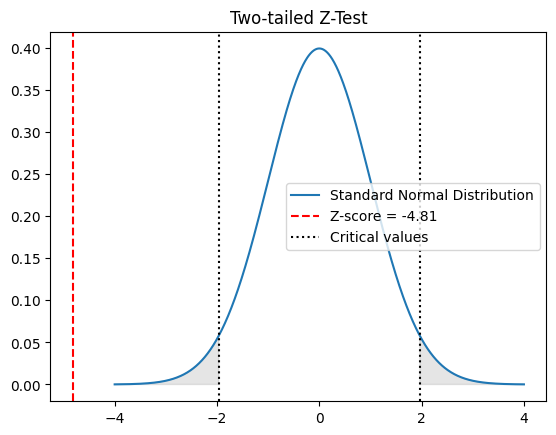

In [7]:
#Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing

import matplotlib.pyplot as plt

def plot_z_test(z, alpha=0.05):
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)

    plt.plot(x, y, label='Standard Normal Distribution')
    plt.axvline(z, color='red', linestyle='--', label=f'Z-score = {z:.2f}')
    z_critical = stats.norm.ppf(1 - alpha/2)
    plt.axvline(z_critical, color='black', linestyle=':', label='Critical values')
    plt.axvline(-z_critical, color='black', linestyle=':')

    plt.title('Two-tailed Z-Test')
    plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical), color='gray', alpha=0.2)
    plt.legend()
    plt.show()

plot_z_test(z)


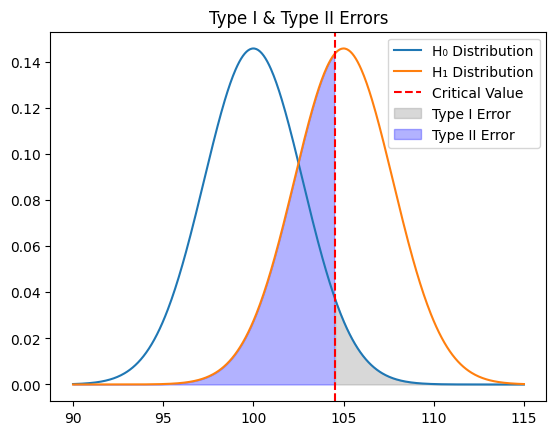

In [8]:
#Write a Python program to perform an independent T-test and interpret the results

def visualize_errors(mu0=100, mu1=105, sigma=15, n=30, alpha=0.05):
    se = sigma / np.sqrt(n)
    x = np.linspace(90, 115, 500)
    null_dist = stats.norm(mu0, se).pdf(x)
    alt_dist = stats.norm(mu1, se).pdf(x)
    z_critical = stats.norm.ppf(1 - alpha)

    plt.plot(x, null_dist, label='H₀ Distribution')
    plt.plot(x, alt_dist, label='H₁ Distribution')

    critical_value = mu0 + z_critical * se
    plt.axvline(critical_value, color='red', linestyle='--', label='Critical Value')

    plt.fill_between(x, null_dist, where=(x >= critical_value), color='gray', alpha=0.3, label='Type I Error')
    plt.fill_between(x, alt_dist, where=(x < critical_value), color='blue', alpha=0.3, label='Type II Error')
    plt.title("Type I & Type II Errors")
    plt.legend()
    plt.show()

visualize_errors()


Paired T-test: T-statistic = -2.54, P-value = 0.0168


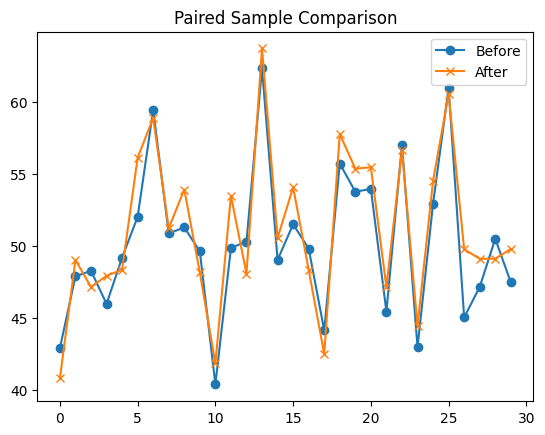

In [9]:
#Perform a paired sample T-test using Python and visualize the comparison results@

from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Simulated paired data
before = np.random.normal(50, 5, 30)
after = before + np.random.normal(1, 2, 30)

# Paired T-test
t_stat, p_val = ttest_rel(before, after)
print(f"Paired T-test: T-statistic = {t_stat:.2f}, P-value = {p_val:.4f}")

# Visualization
plt.plot(before, label='Before', marker='o')
plt.plot(after, label='After', marker='x')
plt.title("Paired Sample Comparison")
plt.legend()
plt.show()

In [10]:
#Simulate data and perform both Z-test and T-test, then compare the results using Python

# Data
sample = np.random.normal(100, 15, 25)
pop_mean = 105

# Z-test
z_stat, z_p = z_test(np.mean(sample), pop_mean, np.std(sample, ddof=1), len(sample))

# T-test
t_stat, t_p = stats.ttest_1samp(sample, pop_mean)

print(f"Z-test: Z = {z_stat:.2f}, P = {z_p:.4f}")
print(f"T-test: T = {t_stat:.2f}, P = {t_p:.4f}")


Z-test: Z = -0.52, P = 0.6008
T-test: T = -0.52, P = 0.6056


In [11]:
#Write a Python function to calculate the confidence interval for a sample mean and explain its significance

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    margin = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - margin, mean + margin

# Example usage
ci_low, ci_high = confidence_interval(data)
print(f"95% Confidence Interval: [{ci_low:.2f}, {ci_high:.2f}]")


95% Confidence Interval: [95.74, 101.15]


In [12]:
#Write a Python program to calculate the margin of error for a given confidence level using sample data

def margin_of_error(data, confidence=0.95):
    n = len(data)
    se = stats.sem(data)
    critical_val = stats.t.ppf((1 + confidence) / 2., df=n-1)
    return critical_val * se

moe = margin_of_error(data)
print(f"Margin of Error: {moe:.2f}")


Margin of Error: 2.70


In [13]:
#D Implement a Bayesian inference method using Bayes' Theorem in Python and explain the processD

def bayes_theorem(prior_A, prob_B_given_A, prob_B_given_not_A):
    prob_not_A = 1 - prior_A
    prob_B = prob_B_given_A * prior_A + prob_B_given_not_A * prob_not_A
    posterior_A_given_B = (prob_B_given_A * prior_A) / prob_B
    return posterior_A_given_B

# Example: Disease testing
prior = 0.01  # 1% population has the disease
sensitivity = 0.99  # P(Test +ve | Disease)
false_positive = 0.05  # P(Test +ve | No Disease)

posterior = bayes_theorem(prior, sensitivity, false_positive)
print(f"Posterior probability of disease given positive test: {posterior:.4f}")


Posterior probability of disease given positive test: 0.1667


In [14]:
#Perform a Chi-square test for independence between two categorical variables in Python

import pandas as pd
from scipy.stats import chi2_contingency

# Sample contingency table
data = [[30, 10], [20, 40]]
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-square: {chi2:.2f}, P-value: {p:.4f}")
print("Expected Frequencies:")
print(pd.DataFrame(expected))


Chi-square: 15.04, P-value: 0.0001
Expected Frequencies:
      0     1
0  20.0  20.0
1  30.0  30.0


In [15]:
#Write a Python program to calculate the expected frequencies for a Chi-square test based on observed dataD

def expected_frequencies(observed):
    total = observed.sum()
    row_totals = observed.sum(axis=1).reshape(-1, 1)
    col_totals = observed.sum(axis=0)
    expected = (row_totals @ col_totals[np.newaxis, :]) / total
    return expected

obs = np.array([[30, 10], [20, 40]])
exp = expected_frequencies(obs)
print("Expected Frequencies:\n", exp)


Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


In [17]:
#Perform a goodness-of-fit test using Python to compare the observed data to an expected distributionD

from scipy.stats import chisquare

# Observed vs expected counts
observed = np.array([18, 22, 20])
expected = np.array([20, 20, 20])

chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square: {chi2_stat:.2f}, P-value: {p_val:.4f}")

Chi-square: 0.40, P-value: 0.8187


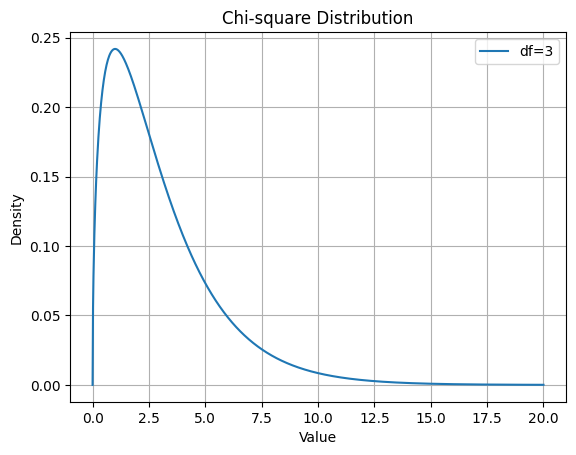

In [16]:
#Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristicsD

df = 3  # degrees of freedom
x = np.linspace(0, 20, 1000)
y = stats.chi2.pdf(x, df)

plt.plot(x, y, label=f'df={df}')
plt.title("Chi-square Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


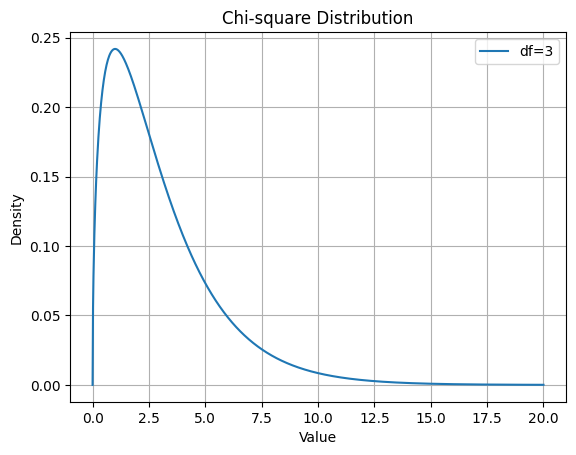

In [18]:
#Implement an F-test using Python to compare the variances of two random samples

df = 3  # degrees of freedom
x = np.linspace(0, 20, 1000)
y = stats.chi2.pdf(x, df)

plt.plot(x, y, label=f'df={df}')
plt.title("Chi-square Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the resultsD

def f_test(sample1, sample2):
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    f = var1 / var2
    dfn = len(sample1) - 1
    dfd = len(sample2) - 1
    p_value = 1 - stats.f.cdf(f, dfn, dfd)
    return f, p_value

# Example
sample1 = np.random.normal(100, 10, 20)
sample2 = np.random.normal(100, 15, 20)
f_stat, p_val = f_test(sample1, sample2)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")


F-statistic: 0.18, P-value: 0.9997


In [20]:
 #Perform a one-way ANOVA test using Python to compare the means of different groups and plot the resultsD

 from scipy.stats import f_oneway

# Example groups
group1 = np.random.normal(20, 5, 30)
group2 = np.random.normal(22, 5, 30)
group3 = np.random.normal(19, 5, 30)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(group1, group2, group3)
print(f"One-Way ANOVA F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")


One-Way ANOVA F-statistic: 1.06, P-value: 0.3518


In [21]:
#Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVAD

from scipy.stats import shapiro, levene

def check_anova_assumptions(*groups):
    # Normality
    for i, group in enumerate(groups):
        stat, p = shapiro(group)
        print(f"Group {i+1} Shapiro-Wilk Test P-value: {p:.4f}")

    # Homogeneity of variances
    stat, p = levene(*groups)
    print(f"Levene's Test for Equal Variances P-value: {p:.4f}")

# Example usage
check_anova_assumptions(group1, group2, group3)



Group 1 Shapiro-Wilk Test P-value: 0.7533
Group 2 Shapiro-Wilk Test P-value: 0.6330
Group 3 Shapiro-Wilk Test P-value: 0.1238
Levene's Test for Equal Variances P-value: 0.1558


                            sum_sq    df         F    PR(>F)
C(Factor1)                6.730370   1.0  0.080597  0.777537
C(Factor2)                3.345184   1.0  0.040059  0.842090
C(Factor1):C(Factor2)   183.505083   1.0  2.197505  0.143840
Residual               4676.342063  56.0       NaN       NaN


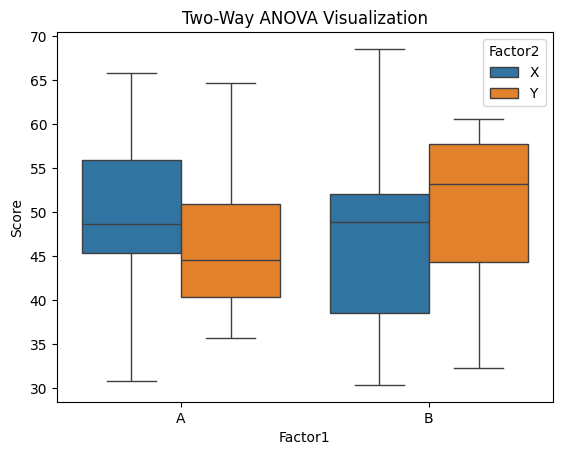

In [22]:
#Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the resultsD

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Simulated Data
np.random.seed(42)
data = pd.DataFrame({
    'Score': np.random.normal(50, 10, 60),
    'Factor1': np.repeat(['A', 'B'], 30),
    'Factor2': np.tile(np.repeat(['X', 'Y'], 15), 2)
})

# Two-way ANOVA
model = ols('Score ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Visualization
import seaborn as sns
sns.boxplot(x='Factor1', y='Score', hue='Factor2', data=data)
plt.title('Two-Way ANOVA Visualization')
plt.show()


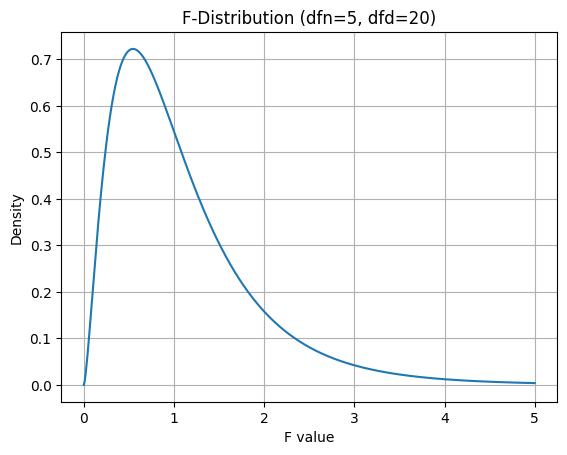

In [23]:
#Write a Python program to visualize the F-distribution and discuss its use in hypothesis testingD

x = np.linspace(0, 5, 500)
dfn, dfd = 5, 20
y = stats.f.pdf(x, dfn, dfd)

plt.plot(x, y)
plt.title("F-Distribution (dfn=5, dfd=20)")
plt.xlabel("F value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


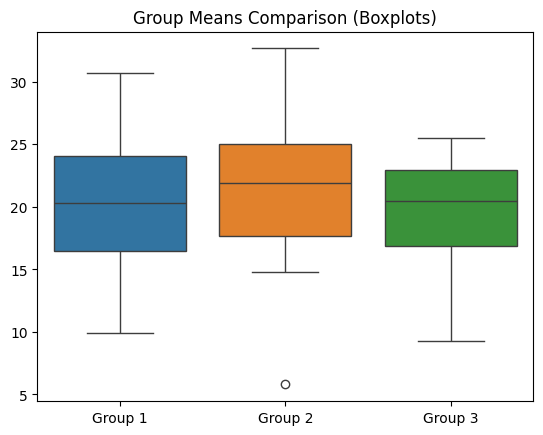

In [24]:
#One-Way ANOVA with Boxplots

sns.boxplot(data=[group1, group2, group3])
plt.xticks([0, 1, 2], ['Group 1', 'Group 2', 'Group 3'])
plt.title('Group Means Comparison (Boxplots)')
plt.show()


In [25]:
#Simulate Data and Perform Hypothesis Test on Means
# Normal distribution data
sample = np.random.normal(50, 10, 100)

# Hypothesis Test
t_stat, p_val = stats.ttest_1samp(sample, 52)
print(f"Simulated Mean Hypothesis Test: T = {t_stat:.2f}, P = {p_val:.4f}")



Simulated Mean Hypothesis Test: T = -2.26, P = 0.0261


In [26]:
# Hypothesis Test for Population Variance (Chi-square Test)

# Sample variance test
sample_var = np.var(sample, ddof=1)
n = len(sample)
chi2_stat = (n-1) * sample_var / 100  # Assume population variance = 100
p_val = 1 - stats.chi2.cdf(chi2_stat, n-1)

print(f"Chi-square Test for Variance: Chi2 = {chi2_stat:.2f}, P = {p_val:.4f}")



Chi-square Test for Variance: Chi2 = 90.02, P = 0.7293


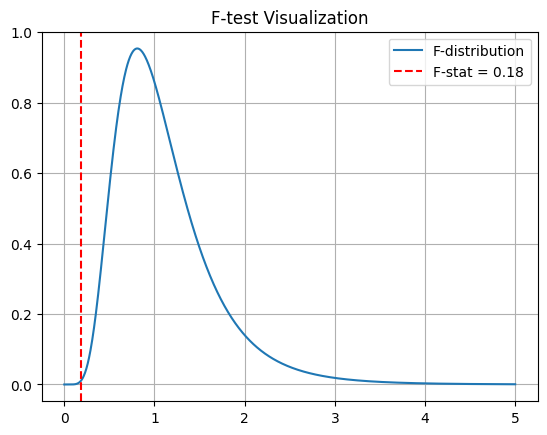

In [27]:
#F-test for Comparing Variances with Visualization\

def visualize_f_test(sample1, sample2):
    f_stat, p_val = f_test(sample1, sample2)
    x = np.linspace(0, 5, 1000)
    y = stats.f.pdf(x, dfn=len(sample1)-1, dfd=len(sample2)-1)
    plt.plot(x, y, label='F-distribution')
    plt.axvline(f_stat, color='red', linestyle='--', label=f'F-stat = {f_stat:.2f}')
    plt.title("F-test Visualization")
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_f_test(sample1, sample2)




In [29]:
#Chi-square Goodness of Fit with Simulated Data

# Simulated observed data
observed = np.random.randint(15, 25, size=5)
expected = np.full(5, 20)

chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
print(f"Simulated Goodness of Fit Test: Chi2 = {chi2_stat:.2f}, P = {p_val:.4f}")


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.030927835051546393